## Puma 09 Bayesian Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv
import dateutil
import os
%matplotlib inline

In [2]:
puma_09 = pd.read_csv('puma_09_HighRisk.csv')
puma_09.columns

Index(['Unnamed: 0', 'SERIALNO', 'Official_Poverty', 'CEO_Income', 'FICAtax',
       'PovunitType', 'EducAttain_2', 'WorkExpIndiv', 'Povunit', 'IncomeTax',
       'ACR', 'SchoolBreakfast', 'HEAP', 'CitizenStatus', 'Official_Threshold',
       'AgeCateg_2', 'AgeCateg_3', 'EducAttain_4', 'CEO_Poverty', 'PUMA',
       'WIC', 'EducAttain_ ', 'HousingStatus', 'WorkersEquiv', 'SchoolLunch',
       'CEO_Threshold', 'AgeCateg_1', 'Boro', 'MOOP', 'MV', 'Childcare',
       'EducAttain_3', 'PreTaxIncome', 'NP', 'EducAttain_1', 'FoodStamps',
       'JWTR', 'Commuting', 'Housing', 'Ethnicity', 'Threshold0', 'Threshold1',
       'Pov_risk'],
      dtype='object')

In [3]:
puma_09.Pov_risk.value_counts()

2.0    15220
0.0     6335
1.0     4185
Name: Pov_risk, dtype: int64

In [4]:
features = ['PovunitType','EducAttain_1','EducAttain_2','EducAttain_4','EducAttain_ ','EducAttain_3',\
                           'WorkExpIndiv','Povunit','WIC', 'MV', 'NP',\
                           'SchoolBreakfast', 'HousingStatus', 'WorkersEquiv', 'SchoolLunch',\
                          'HEAP','AgeCateg_1','AgeCateg_2','AgeCateg_3','MOOP', 'Childcare',\
                          'FoodStamps', 'JWTR', 'Commuting', 'Housing', 'Pov_risk']

In [5]:
data = puma_09[features]

In [6]:
data.shape

(25740, 26)

In [7]:
X = data.iloc[:,:-1]

In [11]:
Y = data.iloc[:,-1:]

In [12]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as rs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
# import required for converting multiclass to binary 
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
# import Random forest
from sklearn.ensemble import RandomForestClassifier as RFC
# import required packages for plotting the decision tree 
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus

In [13]:
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [14]:
y.classes_

array([ 0.,  1.,  2.])

In [15]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [16]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,50,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

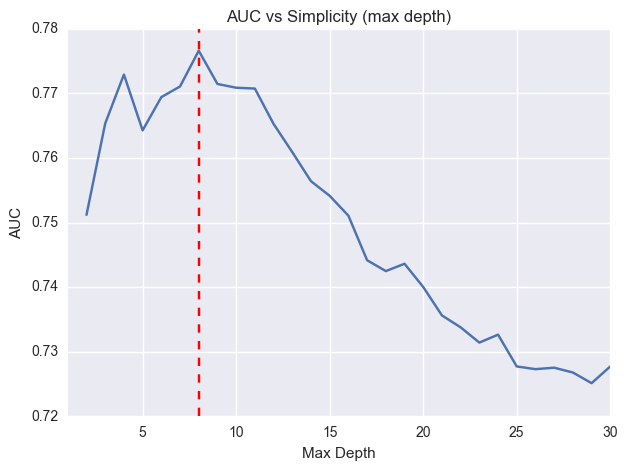

In [19]:
plt.figure(figsize=(7,5))
plt.plot(range(2,50,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(8,color='r',linestyle='--')
plt.xlim(1,30)
plt.show()

In [35]:
rf1 = DTC(max_depth=8, random_state=123)
rf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [36]:
rf1.score(X_train,Y_train)

0.60117660117660121

In [37]:
rf1.score(X_test,Y_test)

0.58534058534058531

In [24]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf1.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
13   WorkersEquiv   0.578422
19           MOOP    0.12169
12  HousingStatus  0.0707197
0     PovunitType  0.0558778
21     FoodStamps  0.0416986

In [39]:
X_train_simple = X_train.loc[:,['WorkersEquiv', 'MOOP','HousingStatus','PovunitType','FoodStamps']]
X_test_simple = X_test.loc[:,['WorkersEquiv', 'MOOP','HousingStatus','PovunitType','FoodStamps']]

In [40]:
real=np.array(Y_test.apply(int))
rf = DTC(max_depth=8) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, Y_train)
pred=rf.predict_proba(X_test_simple)[:,1]
print("The AUC score for this simple model with 5 features is : {}".format(rs(real,pred)))

TypeError: ("cannot convert the series to <class 'int'>", 'occurred at index Pov_risk')

In [27]:
dot_data = StringIO()  

tree.export_graphviz(rf_check, out_file=dot_data, 
                     feature_names=['WorkersEquiv', 'MOOP','HousingStatus','PovunitType','FoodStamps'], 
                     class_names=["poor","high risk","not poor"],  
                     filled=True, rounded=True, 
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

### Random Forest 

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
rf = RFC(n_estimators=30, n_jobs=-1,max_depth=8)
rf.fit(X_train, Y_train)

/Users/shalmali/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [41]:
AUC=[]
rf = RFC(n_estimators=30, n_jobs=-1,max_depth=8)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)
rf.score(X_test, Y_test)
#AUC.append(rs(y_test.ravel(),pred.ravel()))

/Users/shalmali/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.50530950530950536

In [31]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [32]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".\
          format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.466225943566634
For n_clusters =3, the average silhouette_score is :0.4648061304127771
For n_clusters =4, the average silhouette_score is :0.3715779636440868
For n_clusters =5, the average silhouette_score is :0.3759239086667604
For n_clusters =6, the average silhouette_score is :0.38363783263968604
For n_clusters =7, the average silhouette_score is :0.39811903775969726
For n_clusters =8, the average silhouette_score is :0.37056404281956357
For n_clusters =9, the average silhouette_score is :0.3745310126146603


In [33]:
nc = 3
kmeans_cluster = KMeans(n_clusters=nc, random_state=324).fit(X)
centers = kmeans_cluster.cluster_centers_
X['km_labels'] = kmeans_cluster.labels_

In [34]:
X.km_labels.value_counts()

0    18132
1     4279
2     3329
Name: km_labels, dtype: int64

In [42]:
data.Pov_risk.value_counts()

2.0    15220
0.0     6335
1.0     4185
Name: Pov_risk, dtype: int64

In [43]:
from sklearn.cluster import DBSCAN

In [63]:
db = DBSCAN(eps = 1300 , min_samples=2000).fit(X)
print(db.labels_)

[ 0  0 -1 ..., -1 -1 -1]


In [64]:
X['db_label'] = db.labels_

In [65]:
X.db_label.unique()

array([ 0, -1])

In [ ]:
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print(best_model.edges())

In [ ]:
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())